link dataset = 
https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mutual_info_score 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Ridge

DATA PREPARATION

In [100]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [102]:
# select column that we need
column_selected = [ 'Make', 'Model', 'Year', 
                   'Engine HP', 'Engine Cylinders','Transmission Type',
                    'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [103]:
# Make a new dataframe 
new_df = df[column_selected]
new_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [104]:
# rename MSRP variable to price 
new_df = new_df.rename(columns={'MSRP':'price'})

In [105]:
# transform columns name  
new_df.columns = new_df.columns.str.replace(' ', '_').str.lower()

In [106]:
# fill the missing values of the selected features with 0 
new_df.fillna(0, inplace=True)

Question 1
What is the most frequent observation (mode) for the column transmission_type?

In [107]:
new_df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [108]:
# select numerical columns 
numerical_columns = new_df.columns[new_df.dtypes != 'object'].tolist()
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

<Axes: >

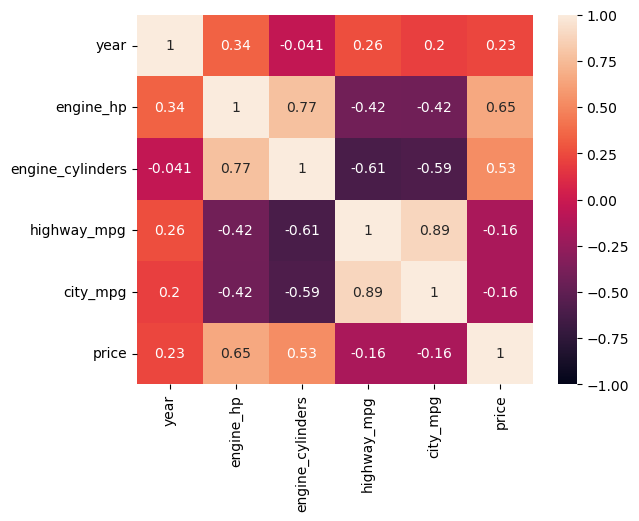

In [109]:
# Make a heatmap visualization
heatmap = sns.heatmap(new_df[numerical_columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap

so the two features that have the biggest correlation in this dataset are hoghway_mpg and city_mpg (0,89)

Make price binary

Now we need to turn the price variable from numeric intoa binary format.

Let's create a variable above_average which is 1 if theprice is above its mean value and 0 otherwise.


In [110]:
# make a new column name above_average 
new_df['above_average'] = [1 if price > new_df['price'].mean() else 0 for price in new_df['price']]


Split the data

Split your data in train/val/test sets with 60%/20%/20%distribution.
Use Scikit-Learn for that (the train_test_split function)and set the seed to 42.
Make sure that the target value (above_average) is not inyour dataframe.


In [111]:
split_preparation = new_df.drop('price', axis= 1)
split_preparation

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [112]:
#split the dataset
df_full_train, df_test = train_test_split(split_preparation, test_size = 0.2, random_state= 42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [113]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [114]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values 
y_test = df_test['above_average'].values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

In [115]:
# calculate the mutual information score between above_average and other categorical variables
category_columns = df_train.columns[df_train.dtypes == 'object'].tolist()
numeric_columms = df_train.columns[df_train.dtypes != 'object'].tolist()


In [116]:
min_score = float('inf')
min_score_column = None 

for i in category_columns:
    score = round(mutual_info_score(df_train[i], y_train), 2)
    print(f'mutual info score column {i} = {score}')

    if score < min_score:
        min_score = score 
        min_score_column = i 

print('')
print(f'Column with the lowest mutual info score: {min_score_column} : {min_score}')

mutual info score column make = 0.24
mutual info score column model = 0.46
mutual info score column transmission_type = 0.02
mutual info score column vehicle_style = 0.08

Column with the lowest mutual info score: transmission_type : 0.02


Question 4

    Now let's train a logistic regression.
    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [117]:
# one hot encoding 
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [118]:
# fit the model on the training dataset 
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [119]:
# one hot encoding and predict the val datset 
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [120]:
# accuracy model 
accuracy = (y_pred == y_val).mean()
print(f"Accuracy model : {round(accuracy,2)}")

Accuracy model : 0.95


In [121]:
lowest_accuracy_drop = float('inf')

for c in df_train.columns:

    dv = DictVectorizer(sparse=False)

    train_dict = df_train.loc[:, df_train.columns != c].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    accuracy2 = (y_pred == y_val).mean()

    accuracy_diff = accuracy - accuracy2

    if accuracy_diff < lowest_accuracy_drop:
        lowest_accuracy_drop = accuracy_diff
        best_column = c

    print(f"without column {c} get accuracy : {accuracy} , different with the original accuracy : {accuracy_diff}")

print('')
print(f'Column drop with smallest difference accuracy : {best_column} : {lowest_accuracy_drop}')

without column make get accuracy : 0.946286193873269 , different with the original accuracy : -0.002937473772555599
without column model get accuracy : 0.946286193873269 , different with the original accuracy : 0.022240872849349502
without column year get accuracy : 0.946286193873269 , different with the original accuracy : -0.0016785564414604215
without column engine_hp get accuracy : 0.946286193873269 , different with the original accuracy : 0.015946286193873282
without column engine_cylinders get accuracy : 0.946286193873269 , different with the original accuracy : -0.0008392782207301552
without column transmission_type get accuracy : 0.946286193873269 , different with the original accuracy : 0.0012589173310951773
without column vehicle_style get accuracy : 0.946286193873269 , different with the original accuracy : 0.003776751993285754
without column highway_mpg get accuracy : 0.946286193873269 , different with the original accuracy : 0.0020981955518254436
without column city_mpg ge

Question 6

    For this question, we'll see how to use a linear regression model from Scikit-Learn.
    We'll need to use the original column price. Apply the logarithmic transformation to this column.
    Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
    This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
    Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

In [132]:
df_lin = new_df.copy()

In [133]:
df_lin = df_lin.drop(columns='above_average')

In [134]:
df_lin['price'] = np.log1p(df_lin['price'])

In [135]:
df_full_train, df_test = train_test_split(df_lin, test_size = 0.2, random_state= 42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [136]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['price'].values
y_val = df_val['price'].values 
y_test = df_test['price'].values

del df_train['price']
del df_val['price']
del df_test['price']

In [137]:
dv = DictVectorizer(sparse = False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [139]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    # fit the model on the training dataset
    model = Ridge(alpha=alpha, solver='sag', random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # ohe and predict the val dataset
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    rmse_score = round(np.sqrt(mean_squared_error(y_val, y_pred)),3)

    print(f'RMSE for alpha {alpha} : {rmse_score}')

c:\Users\User\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE for alpha 0 : 0.487


KeyboardInterrupt: 